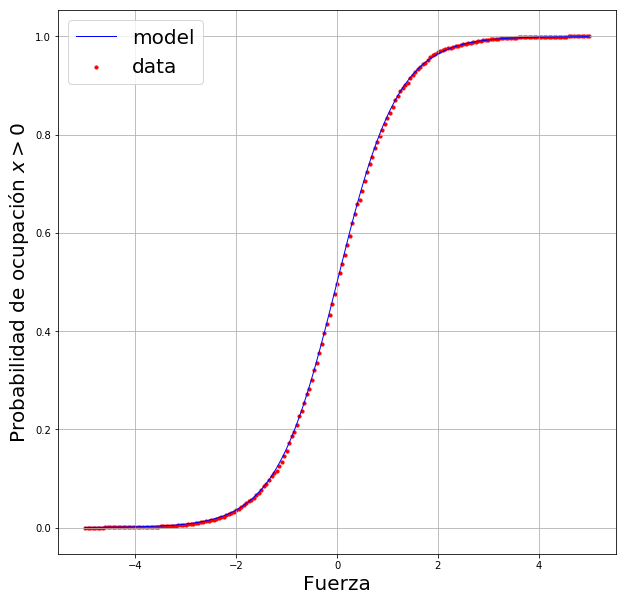

La temperatura es del baño es: -1.21


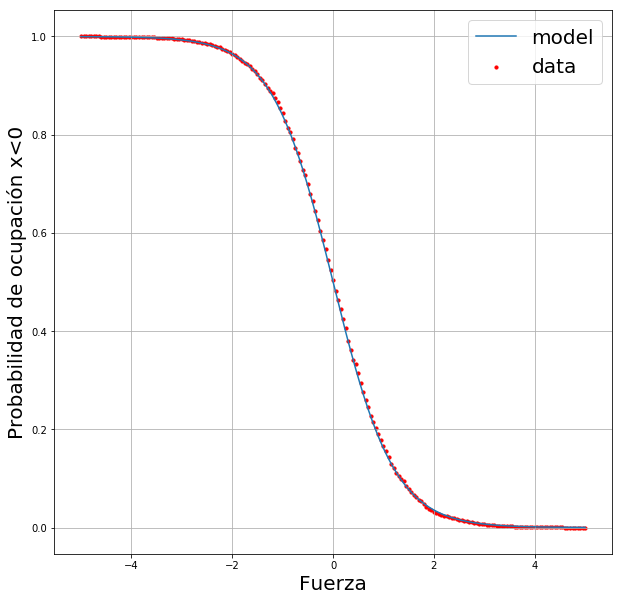

In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from pylab import *

# Cargo los datos
Data=pd.read_csv('Data/VariandoFuerza/Probabilidades.csv')
# Defino la funcion
def f(x,A):
    return 1/(1+np.exp(2*A*x))
# Hago el ajuste
popt,pcov=curve_fit(f,Data.loc[:,"F"],Data.loc[:,"+x"])
# Defino el tamaño de la gráfica
plt.figure(figsize=(10,10))
# Defino los puntos que tomara la funcion en el modelo
xfine=np.linspace(-5,5,500)
# Dibujo la funcion y hago scatteringn de los datos
plot(xfine,f(xfine,*popt),color='b',lw=1,label='model')
plt.scatter(Data.loc[:,"F"],Data.loc[:,"+x"],alpha=1,s=10,label='data',color='red')
# Coloco el nombre a los ejes, el grid y la leyenda
plt.xlabel(r"Fuerza",fontsize='20')
plt.ylabel(r"Probabilidad de ocupación $x>0$",fontsize='20')
plt.grid()
plt.legend(prop={'size':'20'})
# Guardo los datos
plt.savefig("DoblePozo_IMG/VariandoFuerza/ProbabilidadFrenteFuerza+x.png")
plt.show()
print("La temperatura es del baño es: %.2f"%(1/popt[0]))

# Hago otra vez el ajuste para x negativo
popt,pcov=curve_fit(f,Data.loc[:,"F"],Data.loc[:,"-x"])
# Dibujo la gráfica
plt.figure(figsize=(10,10))
plot(xfine,f(xfine,*popt),label='model')
plt.scatter(Data.loc[:,"F"],Data.loc[:,"-x"],label='data',color='red',s=10)
plt.grid()
plt.ylabel(r"Probabilidad de ocupación x<0",fontsize='20')
plt.xlabel(r"Fuerza",fontsize='20')
plt.legend(prop={'size':'20'})
plt.savefig("DoblePozo_IMG/VariandoFuerza/ProbabilidadFrenteFuerza-x.png")
plt.show()


Probabilidad de ocupación:

|T|B|Eta|$P_{-x}$|$P_{+x}$|
|:--:|:--:|:--:|:--:|:--:|
|0.2|2|1|0.482|0.518|

Equipartición:

|T|B|Eta|$E_{cin}$|$E_{pot}$|
|:--:|:--:|:--:|:--:|:--:|
|0.200|2.000|1.000|0.100|1.874|
|2.000| 1.000| 1.000| 0.992| 1.039|
|2.000| 1.000| 10.000| 1.003| 1.045|
|2.000| 5.000| 1.000| 0.990| 4.138|

$$P(x)=\frac{1}{1+e^{-\frac{F\cdot x}{T}}}$$

Ecuacion ajuste Doble pozo:

$$A\cdot e^{-V(x)/T}$$

In [10]:
import scipy.integrate as integrate
import numpy as np
T=10
B=2
def gauss(x,A):
    return A*np.exp(-B*(x**2-1)**2/T)

AA=integrate.quad(lambda x: gauss(x,1), -6, 6)
print(gauss(0,1)/AA[0])

0.2555356854522669


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from pylab import *

# Pongo k_b*T=0.2
T=0.2
print(T)
# Cargo los datos
Data=pd.read_csv('Jorge/Data_T=0.2_B=1_Eta=0.1.csv')
numbins=120
# Saco la gráfica con el histograma
n, bins, patches = plt.hist(Data.loc[:,"Posicion"], numbins, density=True, facecolor='g', alpha=0.2,label='data') 
# Utiles para normalizar y hacer el curve_fit
hist,bins = np.histogram(Data.loc[:,"Posicion"],bins = numbins) 
Paso=bins[1]-bins[0]
xData=np.arange(min(bins)+Paso/2,max(bins),Paso)
xData=xData.astype(np.float)
hist=hist.astype(np.float)
x=xData
# Calculo el area de histograma para poder normalizar
Area=0
for i in range(0,len(bins)-1,1):
    Area=Area+Paso*hist[i]
# Defino la funcion para el curve_fit
def gauss(x,A):
    return A*np.exp(-(x**2-1)**2/T)
# Hago el ajuste
popt, pcov = curve_fit(gauss,xData,hist/Area)
# Los valores de x que tomará la funcion
xfine = np.linspace(-6,6,500)  
# Grafica de la funcion
plot(xfine,gauss(xfine,*popt),color='g',lw=3,label='model')
plt.xlabel('Posición')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.legend()
# Guardo la imagen
plt.savefig("5.png")

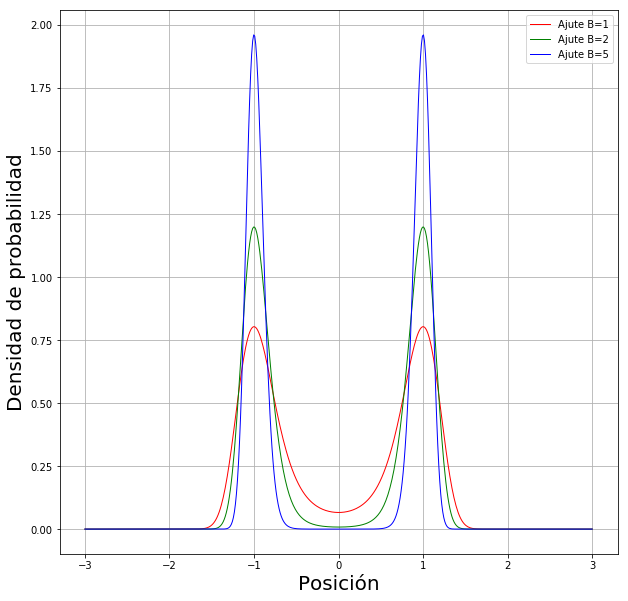

In [33]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from pylab import *
T=0.2
def f(x,A,B):
    return np.exp(-0.5*B*(x**2-1)**2/T)/A
# Pongo k_b*T=0.2
xfine = np.linspace(-3,3,500)  
plt.figure(figsize=(10,10))
plot(xfine,f(xfine,1.245246,1),color='r',lw=1,label='Ajute B=1')
plot(xfine,f(xfine,0.834059,2),color='g',lw=1,label='Ajute B=2')
plot(xfine,f(xfine,0.509655,5),color='b',lw=1,label='Ajute B=5')

plt.xlabel("Posición",fontsize='20')
plt.ylabel(r"Densidad de probabilidad",fontsize='20')
plt.legend(prop={'size':'20'})
plt.legend()
plt.grid()
plt.savefig("Evolucion.png")
